### 1. Import Packages

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
#Set default setting of seaborn
sns.set()

### 2. Read the Data

In [2]:
#read the data
raw_data = pd.read_csv(r"C:\Users\Tarun\Desktop\DS\Machine Learning\Supervised Learning\Python\Linear regression with SGD\Vehicle Performance Prediction\Dataset\data.csv")
#print the first 5 rows of the data
raw_data.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [3]:
data = raw_data.copy(deep=True)

### 3. Understand and Prepare the Data

**3.1 Data Types and Dimensions**

In [4]:
#check the data types for variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
raw_data.shape

(398, 9)

**3.2 Checking for Missing Values**

In [6]:
#get the count of missing values
missing_values = data.isnull().sum()

#print the count of missing values
print(missing_values)

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64


**3.3 Data Correction**

In [7]:
data.dtypes

origin                   int64
cylinders                int64
displacement           float64
horsepower              object
weight                   int64
acceleration           float64
year                     int64
name                    object
Kilometer_per_liter    float64
dtype: object

In [8]:
data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

Removing '?' from horsepower

In [9]:
data = data[data.horsepower != '?']
'?' in data.horsepower

False

In [10]:
data.shape

(392, 9)

In [11]:
data.horsepower = data.horsepower.astype('float')
data.dtypes

origin                   int64
cylinders                int64
displacement           float64
horsepower             float64
weight                   int64
acceleration           float64
year                     int64
name                    object
Kilometer_per_liter    float64
dtype: object

In [12]:
data_1 = data.copy(deep=True)

In [13]:
data_1.origin = data_1.origin.astype('object')

In [14]:
#split() with expand=True yields one column per list element
#we only split on the first space by setting n=1
data_1[['manufacturer', 'model']] = data_1['name'].str.split(" ", n=1, expand=True)
data_1.drop('name', axis=1, inplace=True)
data_1.head(1).T

,0
origin,1
cylinders,8
displacement,307.0
horsepower,130.0
weight,3504
acceleration,12.0
year,1970
Kilometer_per_liter,7.652587
manufacturer,chevrolet
model,chevelle malibu


In [15]:
print(sorted(data_1.manufacturer.unique()))

['amc', 'audi', 'bmw', 'buick', 'cadillac', 'capri', 'chevroelt', 'chevrolet', 'chevy', 'chrysler', 'datsun', 'dodge', 'fiat', 'ford', 'hi', 'honda', 'maxda', 'mazda', 'mercedes', 'mercedes-benz', 'mercury', 'nissan', 'oldsmobile', 'opel', 'peugeot', 'plymouth', 'pontiac', 'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'triumph', 'vokswagen', 'volkswagen', 'volvo', 'vw']


In [16]:
errors = {
    "vokswagen": "volkswagen",
    "vw": "volkswagen",
    "toyouta": "toyota",
    "mercedes-benz": "mercedes",
    "chevroelt": "chevrolet", 
    "chevy": "chevrolet",
    "maxda": "mazda"
}

data_1.manufacturer = data_1.manufacturer.map(errors).fillna(data_1.manufacturer)

print(sorted(data_1.manufacturer.unique()))

['amc', 'audi', 'bmw', 'buick', 'cadillac', 'capri', 'chevrolet', 'chrysler', 'datsun', 'dodge', 'fiat', 'ford', 'hi', 'honda', 'mazda', 'mercedes', 'mercury', 'nissan', 'oldsmobile', 'opel', 'peugeot', 'plymouth', 'pontiac', 'renault', 'saab', 'subaru', 'toyota', 'triumph', 'volkswagen', 'volvo']


In [17]:
data_1.model.head(10)

0    chevelle malibu
1        skylark 320
2          satellite
3          rebel sst
4             torino
5        galaxie 500
6             impala
7           fury iii
8           catalina
9     ambassador dpl
Name: model, dtype: object

In [18]:
import re
def alphanumeric(x):
    return re.sub('[^A-Za-z0-9]+', '', (str(x)))

data_1['model'] = data_1.model.apply(lambda x: alphanumeric(x))
print(len(data_1.model.unique()))

293


**3.4 Statistical Summary**

In [19]:
#data frame with numerical features
data_1.describe()

,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,194.411990,104.469388,2977.584184,15.541327,1975.979592,9.967885
std,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,3.318250
min,3.000000,68.000000,46.000000,1613.000000,8.000000,1970.000000,3.826293
25%,4.000000,105.000000,75.000000,2225.250000,13.775000,1973.000000,7.227443
50%,4.000000,151.000000,93.500000,2803.500000,15.500000,1976.000000,9.672019
75%,8.000000,275.750000,126.000000,3614.750000,17.025000,1979.000000,12.329168
max,8.000000,455.000000,230.000000,5140.000000,24.800000,1982.000000,19.811697


In [20]:
#data frame with categorical features
data_1.describe(include='object')

,origin,manufacturer,model
count,392,392,392
unique,3,30,293
top,1,ford,matador
freq,245,48,5


### 4. EDA

PDF's of features

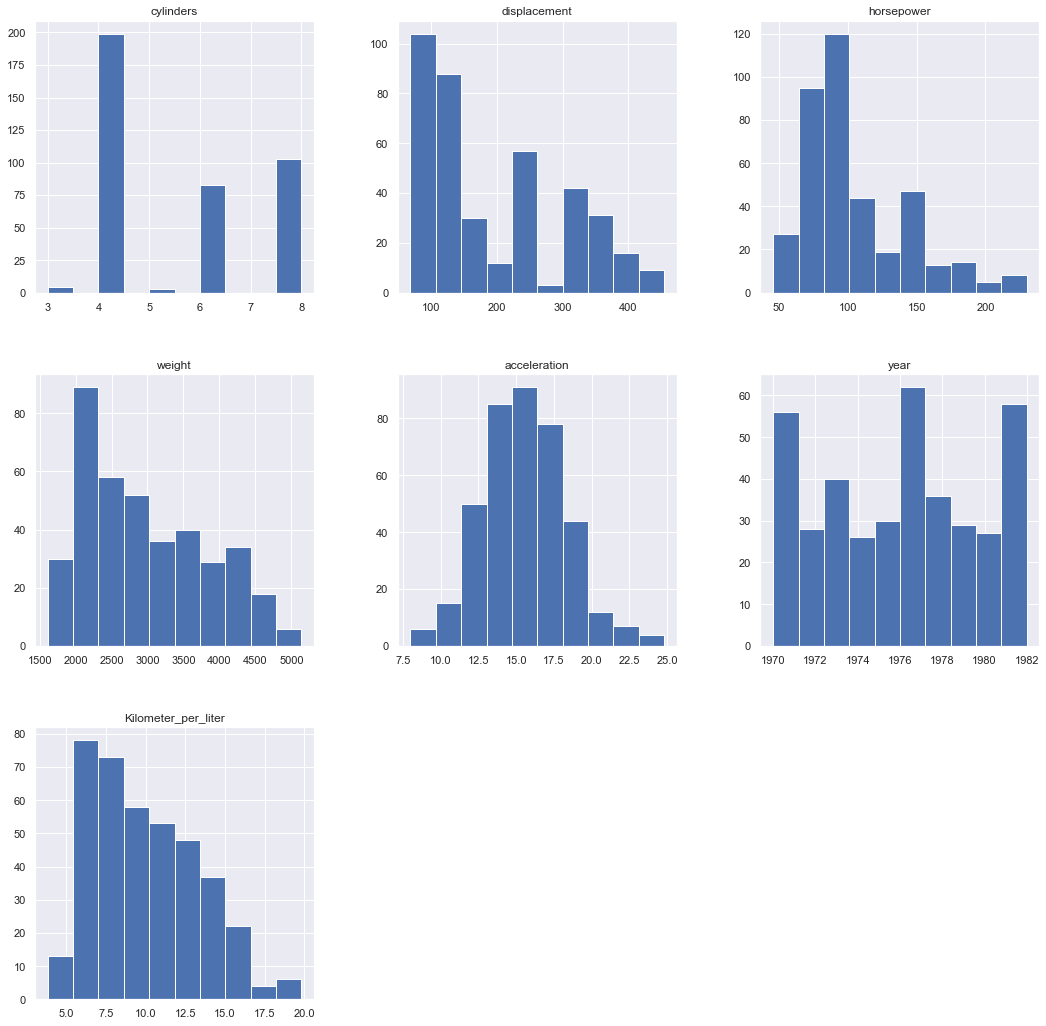

In [21]:
fig = data_1.hist(figsize=(18, 18))

## **4.1 Univariate Analysis**

### 4.1.1) Kilometer_per_liter

In [22]:
data_1.Kilometer_per_liter.describe()

count    392.000000
mean       9.967885
std        3.318250
min        3.826293
25%        7.227443
50%        9.672019
75%       12.329168
max       19.811697
Name: Kilometer_per_liter, dtype: float64

C:\Users\Tarun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Kilometer_per_liter', ylabel='Density'>

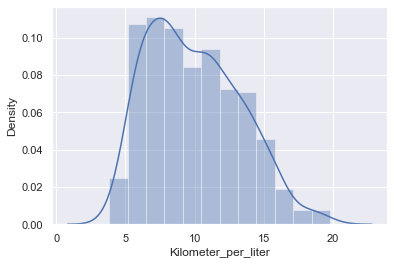

In [23]:
sns.distplot(data_1.Kilometer_per_liter)

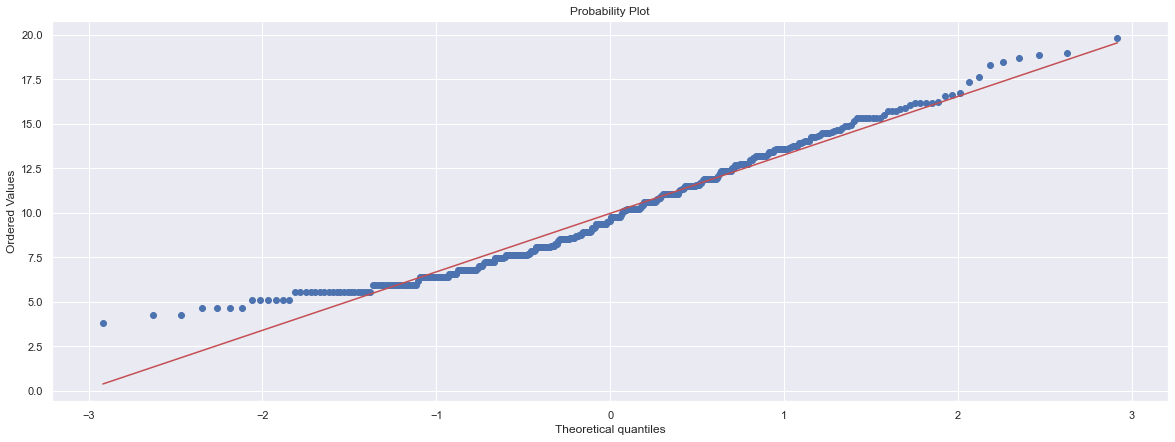

We expect that our data points will be on red line for gaussian distribution. We see dist tails.


In [24]:
#qq plot
plt.figure(figsize=(20, 7))
stats.probplot(data_1['Kilometer_per_liter'], plot=plt)
plt.show()
print("We expect that our data points will be on red line for gaussian distribution. We see dist tails.")

In [25]:
print("Skewness: %f" % data['Kilometer_per_liter'].skew())
print("Kurtosis: %f" % data['Kilometer_per_liter'].kurt())

Skewness: 0.457092
Kurtosis: -0.515993


Log Transformation

In [26]:
data_2 = data_1.copy(deep=True)

In [27]:
data_2['log_mileage'] = np.log(data_2.Kilometer_per_liter)
data_2.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,manufacturer,model,log_mileage
0,1,8,307.0,130.0,3504,12.0,1970,7.652587,chevrolet,chevellemalibu,2.035044
1,1,8,350.0,165.0,3693,11.5,1970,6.377156,buick,skylark320,1.852722
2,1,8,318.0,150.0,3436,11.0,1970,7.652587,plymouth,satellite,2.035044
3,1,8,304.0,150.0,3433,12.0,1970,6.802299,amc,rebelsst,1.917261
4,1,8,302.0,140.0,3449,10.5,1970,7.227443,ford,torino,1.977885


C:\Users\Tarun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_mileage', ylabel='Density'>

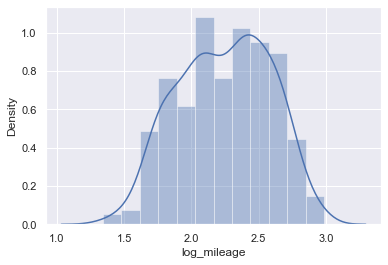

In [28]:
sns.distplot(data_2.log_mileage)

#qq plot
plt.figure(figsize=(20, 7))
stats.probplot(data_2['log_mileage'], plot=plt)
plt.show()
print("We expect that our data points will be on red line for gaussian distribution. We see dist tails.")

### 4.1.2) Distribution of Displacement

In [29]:
data_2.displacement.describe()

count    392.000000
mean     194.411990
std      104.644004
min       68.000000
25%      105.000000
50%      151.000000
75%      275.750000
max      455.000000
Name: displacement, dtype: float64

C:\Users\Tarun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='displacement', ylabel='Density'>

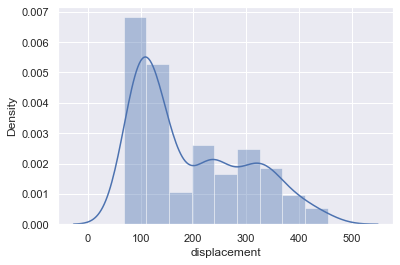

In [30]:
sns.distplot(data_2.displacement)

### 4.1.3) Ananlysis of Cylinder

C:\Users\Tarun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


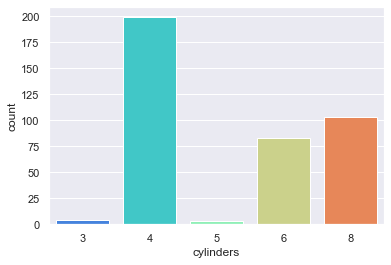

In [31]:
sns.countplot(data_2.cylinders,palette="rainbow")
plt.show()

In [32]:
data_3 = data_2.copy(deep=True)

In [33]:
data_3.cylinders = data_3.cylinders.astype('object')

In [34]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               392 non-null    object 
 1   cylinders            392 non-null    object 
 2   displacement         392 non-null    float64
 3   horsepower           392 non-null    float64
 4   weight               392 non-null    int64  
 5   acceleration         392 non-null    float64
 6   year                 392 non-null    int64  
 7   Kilometer_per_liter  392 non-null    float64
 8   manufacturer         392 non-null    object 
 9   model                392 non-null    object 
 10  log_mileage          392 non-null    float64
dtypes: float64(5), int64(2), object(4)
memory usage: 44.9+ KB


###### from o/p cylinders attribute is now object

### 4.1.4) Analysis of model year

C:\Users\Tarun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


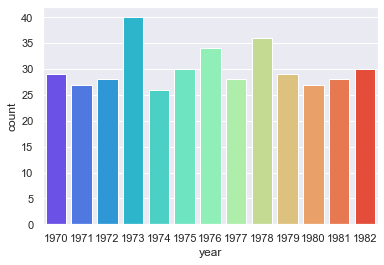

In [35]:
sns.countplot(data_3['year'],palette='rainbow')
plt.show()

### 4.1.5) Analysis of Origin

C:\Users\Tarun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


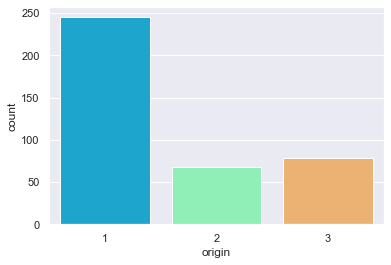

In [36]:
sns.countplot(data_3['origin'],palette='rainbow')
plt.show()

### 4.1.6) Analysis of Horsepower

C:\Users\Tarun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


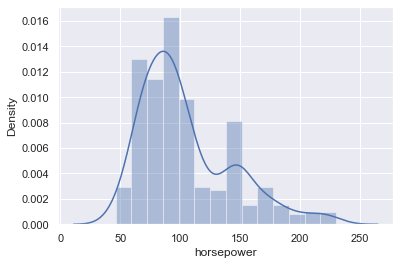

In [37]:
sns.distplot(data_3.horsepower)
plt.show()

In [38]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


cars from 30 manufacturers (Top10)
----------  --
ford        48
chevrolet   47
plymouth    31
dodge       28
amc         27
toyota      26
datsun      23
volkswagen  22
buick       17
pontiac     16
----------  --


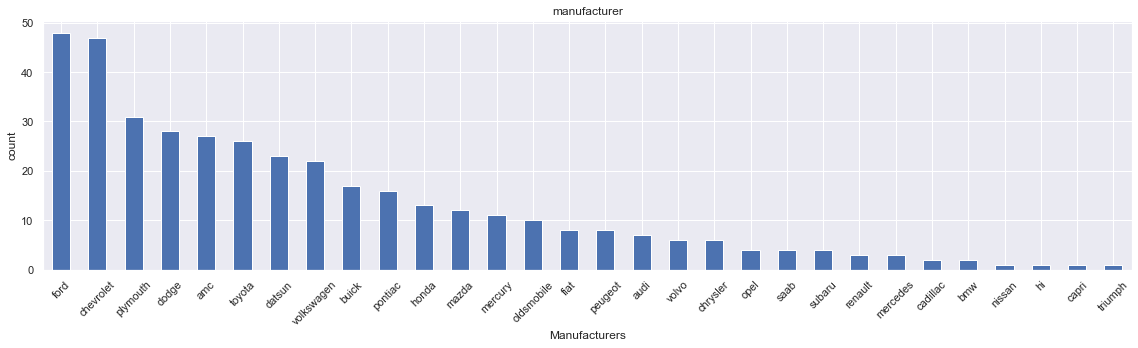

In [39]:
from tabulate import tabulate
print(f"cars from {data_3.manufacturer.nunique()} manufacturers (Top10)")
print(tabulate(pd.DataFrame(data_3.manufacturer.value_counts()[:10])))

plt.figure(figsize=(16,5));
data_3.groupby('manufacturer')["manufacturer"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("manufacturer")
plt.ylabel("count")
plt.xlabel("Manufacturers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

30 Car models (Top 10
--------  -
matador   5
pinto     5
corolla   5
rabbit    5
gremlin   4
impala    4
maverick  4
chevette  4
corona    4
504       4
--------  -


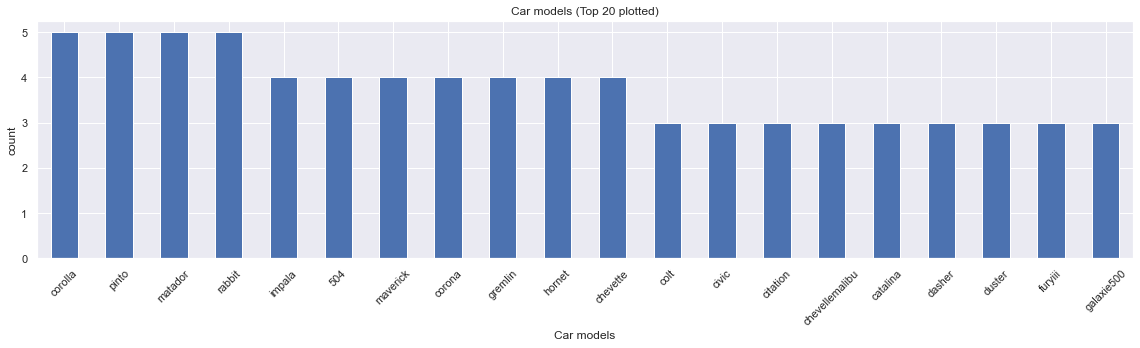

In [40]:
print(f"{data_3.manufacturer.nunique()} Car models (Top 10")
print(tabulate(pd.DataFrame(data_3.model.value_counts()[:10])))

plt.figure(figsize=(16,5));
data_3.groupby('model')["model"].count().sort_values(ascending=False)[:20].plot(kind="bar")
plt.title("Car models (Top 20 plotted)")
plt.ylabel("count")
plt.xlabel("Car models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4.2 Multivariate Analysis

#### 4.2.1 Anaylsis of kilometer_per_liter with horsepower

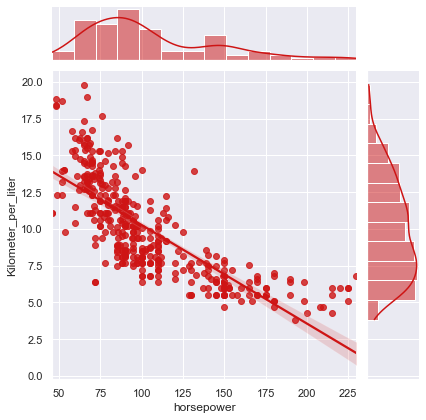

In [41]:
x = data_3[['Kilometer_per_liter','horsepower']]
sns.jointplot(x = x.loc[:,'horsepower'], y = x.loc[:,'Kilometer_per_liter'],kind="reg",color="#ce1414")

#### 4.2.2 Anaylsis of kilometer_per_liter with weight

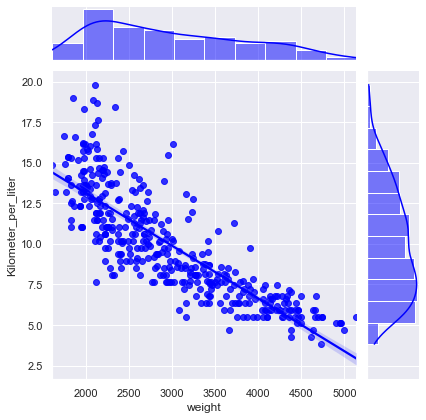

In [42]:
x = data_3[['Kilometer_per_liter','weight']]
sns.jointplot(x = x.loc[:,'weight'], y = x.loc[:,'Kilometer_per_liter'],kind="reg",color="blue")

#### 4.2.3 Anaylsis of kilometer_per_liter with acceleration

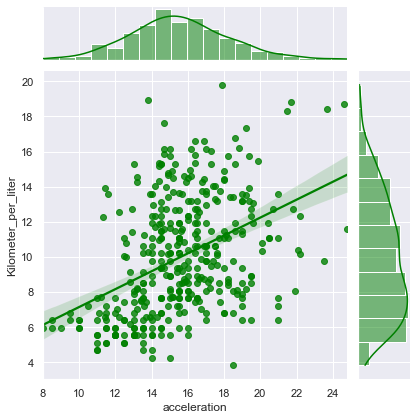

In [43]:
x = data_3[['Kilometer_per_liter','acceleration']]
sns.jointplot(x = x.loc[:,'acceleration'], y = x.loc[:,'Kilometer_per_liter'],kind="reg",color="green")

#### 4.2.4 Anaylsis of kilometer_per_liter with displacement

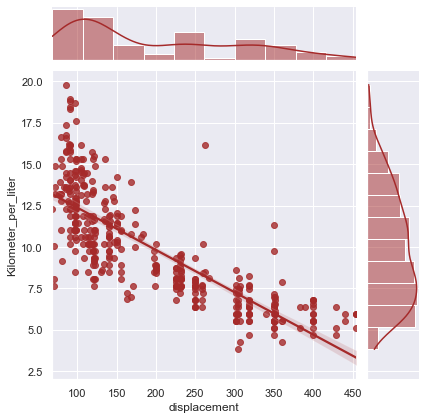

In [44]:
x = data_3[['Kilometer_per_liter','displacement']]
sns.jointplot(x = x.loc[:,'displacement'], y = x.loc[:,'Kilometer_per_liter'],kind="reg",color="brown")

#### 4.2.5 Anaylsis of kilometer_per_liter with cylinders 

Since cylinders has very few data points we are using box plot

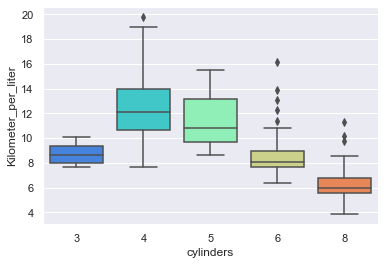

In [45]:
sns.boxplot(y='Kilometer_per_liter',x='cylinders',data=data_3,palette='rainbow')
plt.show()

#### 4.2.6 Anaylsis of kilometer_per_liter with year

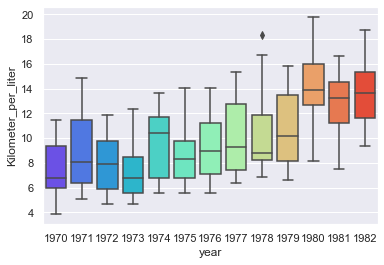

In [46]:
sns.boxplot(y='Kilometer_per_liter',x='year',data=data_3,palette='rainbow')
plt.show()

## 4.3) Covarience

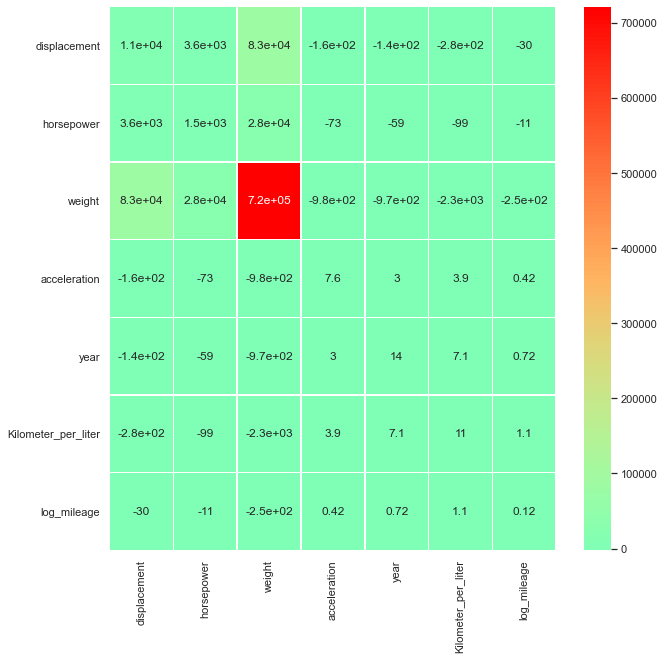

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(data_3.cov(),annot=True,linewidth=0.5,center=0,cmap='rainbow')
plt.show()

## 4.4) Correlation

In [48]:
data_num = data_3.drop(['Kilometer_per_liter','log_mileage','origin'],axis = 1)
corr=data_num.corr()
corr

,displacement,horsepower,weight,acceleration,year
displacement,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,-0.543800,-0.689196,-0.416839,1.000000,0.290316
year,-0.369855,-0.416361,-0.309120,0.290316,1.000000


<AxesSubplot:>

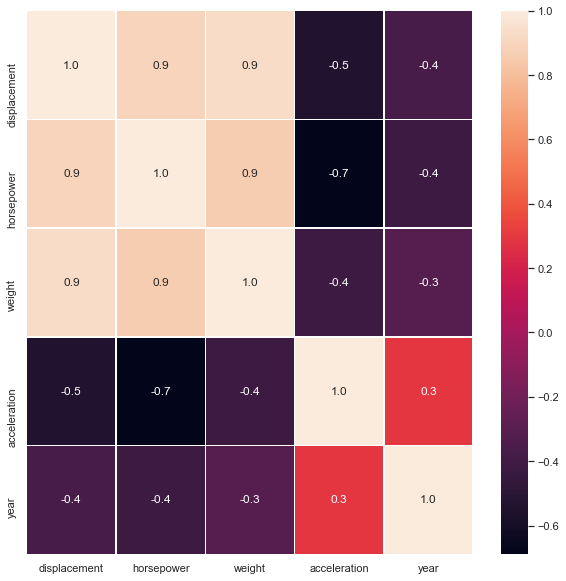

In [49]:
# correlation map
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(data_num.corr(),annot=True,linewidths=0.5,fmt='.1f',ax=ax)

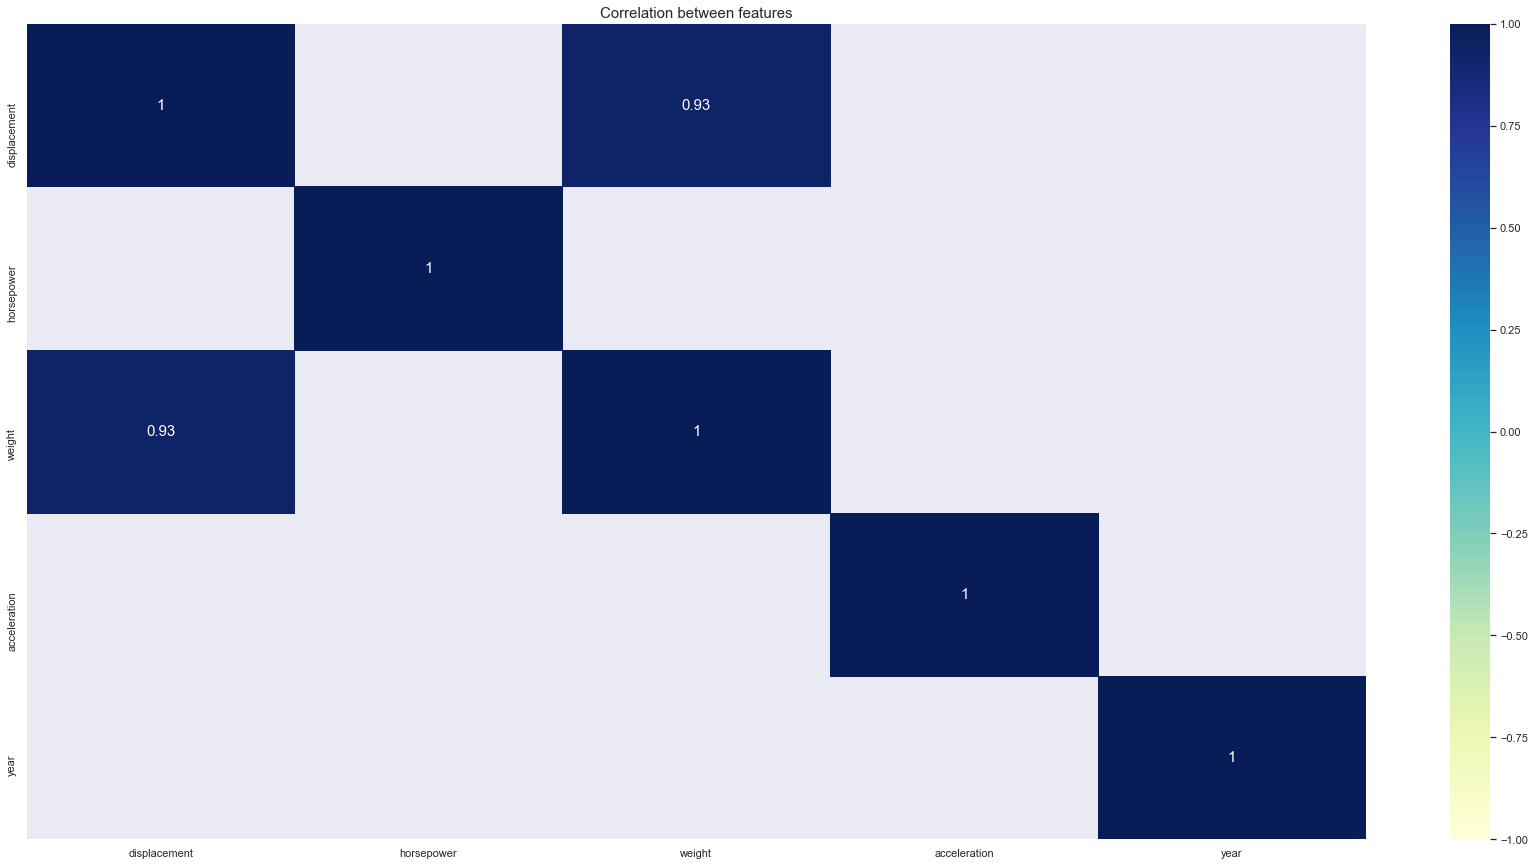

In [50]:
plt.figure(figsize=(30,15))
sns.heatmap(corr[(corr>=0.9) | (corr<=-0.9)],
        cmap='YlGnBu',vmax=1.0,vmin=-1.0,
        annot=True,annot_kws={"size":15})

plt.title('Correlation between features',fontsize=15)
plt.show()

In [51]:
drop_list = ['weight','displacement','manufacturer','model']
data_cleaned = data_3.drop(drop_list,axis=1)
data_cleaned.head()

,origin,cylinders,horsepower,acceleration,year,Kilometer_per_liter,log_mileage
0,1,8,130.0,12.0,1970,7.652587,2.035044
1,1,8,165.0,11.5,1970,6.377156,1.852722
2,1,8,150.0,11.0,1970,7.652587,2.035044
3,1,8,150.0,12.0,1970,6.802299,1.917261
4,1,8,140.0,10.5,1970,7.227443,1.977885


In [52]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               392 non-null    object 
 1   cylinders            392 non-null    object 
 2   horsepower           392 non-null    float64
 3   acceleration         392 non-null    float64
 4   year                 392 non-null    int64  
 5   Kilometer_per_liter  392 non-null    float64
 6   log_mileage          392 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 32.6+ KB


In [53]:
data_cleaned.columns

Index(['origin', 'cylinders', 'horsepower', 'acceleration', 'year',
       'Kilometer_per_liter', 'log_mileage'],
      dtype='object')

## 5) Label Encoding of categorical data

In [54]:
data_with_dummies = pd.get_dummies(data_cleaned,drop_first = True)
data_with_dummies.head()

,horsepower,acceleration,year,Kilometer_per_liter,log_mileage,origin_2,origin_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8
0,130.0,12.0,1970,7.652587,2.035044,0,0,0,0,0,1
1,165.0,11.5,1970,6.377156,1.852722,0,0,0,0,0,1
2,150.0,11.0,1970,7.652587,2.035044,0,0,0,0,0,1
3,150.0,12.0,1970,6.802299,1.917261,0,0,0,0,0,1
4,140.0,10.5,1970,7.227443,1.977885,0,0,0,0,0,1


## 6) Standardise Data

In [55]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
x = data_with_dummies.drop(['Kilometer_per_liter','log_mileage'],axis=1)

In [57]:
scaler = MinMaxScaler()
scaler.fit(x)

MinMaxScaler()

In [58]:
X = scaler.fit_transform(x)

In [59]:
y = data_with_dummies.log_mileage

#### Splitting data into train and test set

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (313, 9)
y_train (313,)
X_test (79, 9)
y_test (79,)


## 7) Linear Regression

### 7.1 OLS

In [62]:
from sklearn.linear_model import LinearRegression

OLS_model = LinearRegression()

OLS_model.fit(X_train,y_train)

LinearRegression()

In [63]:
y_pred_OLS = OLS_model.predict(X_test)

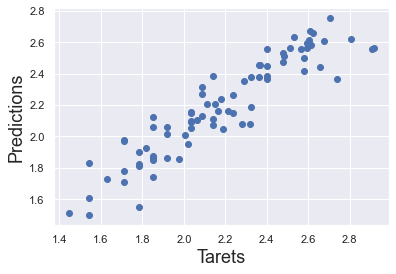

In [64]:
plt.scatter(y_test,y_pred_OLS)
plt.xlabel('Tarets', size = 18)
plt.ylabel('Predictions',size = 18)
plt.show()

In [65]:
#compute R-squared 
r_sq_OLS = OLS_model.score(X_train,y_train)
#R-squared is a statistical measure that represents the proportion of the variance for a dependent
#variable that's explained by an independent variable or variables in a regression model

n=313
p=9

adj_r_sq_OLS = 1 - (1-r_sq_OLS)*(n-1)/(n-p-1)
#Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of
#predictors in the model

from sklearn.metrics import mean_squared_error as mean_sq_error
from math import sqrt
#The root-mean-square deviation or root-mean-square error is a frequently used measure of the
#differences between values predicted by a model or an estimator and the values observed

rmse_OLS = sqrt(mean_sq_error(y_test,y_pred_OLS))

##### 4. Tabulate results

In [66]:
cols = ['Model','R-squared','Adj R-squared','RMSE']

result_tabulation = pd.DataFrame(columns = cols)

OLS_metrics = pd.Series({'Model':'OLS','R-squared':r_sq_OLS,'Adj R-squared':adj_r_sq_OLS,'RMSE':rmse_OLS})

result_tabulation = result_tabulation.append(OLS_metrics,ignore_index=True)

result_tabulation

,Model,R-squared,Adj R-squared,RMSE
0,OLS,0.86382,0.859775,0.135834


## 7.2 SGD

In [67]:
from sklearn.linear_model import SGDRegressor

#build the model
SGD_model = SGDRegressor(loss='squared_loss', alpha=0.1, max_iter=1000)

#fit the model
SGD_model.fit(X_train, y_train)
#alpha:float, default=0.0001
#Constant that multiplies the regularization term. The higher the value, the stronger the
#regularization
#max_iter:int, default=1000
#The maximum number of passes over the training data (aka epochs)

SGDRegressor(alpha=0.1)

In [68]:
#predict the values
y_pred_SGD = SGD_model.predict(X_test)

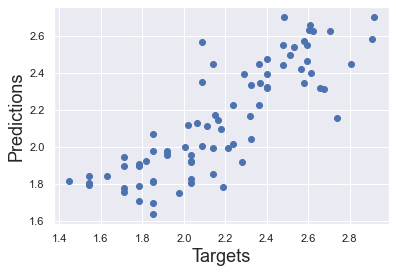

In [69]:
plt.scatter(y_test, y_pred_SGD)
plt.xlabel('Targets', size=18)
plt.ylabel('Predictions', size=18)
plt.show()

In [77]:
#compute the R-squared
r_squared_SGD = SGD_model.score(X_train, y_train)

#Number of observation or sample size
n = 313

#No of independent variables
p = 9

#Compute Adj-R-Squared
adj_r_sq_SGD = 1 - (1-r_squared_SGD) * (n-1) / (n-p-1)
rmse_SGD = sqrt(mean_sq_error(y_test, y_pred_SGD))

In [78]:
#compiling the required information
SGD_metrics = pd.Series({'Model': 'SGD', 'R-squared': r_squared_SGD, 'Adj-R-squared': adj_r_sq_SGD, 'RMSE': rmse_SGD})

#appending our result table
result_tabulations = result_tabulation.append(SGD_metrics, ignore_index=True)

#view the result table
result_tabulations

,Model,R-squared,Adj R-squared,RMSE,Adj-R-squared
0,OLS,0.863820,0.859775,0.135834,NaN
1,SGD,0.731004,NaN,0.195727,0.723014
